In [335]:
# import os
# os.chdir('/home/hugo-dev/esirem-dev/4a/kmutt/kmutt_v2')

In [336]:
import numpy as np
import plotly.express as px
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
from utils.load_data import load_data_with_mapping

In [337]:
DATA_PATH = '/Users/hugog/hugo-dev/esirem-dev/4a/kmutt/kmutt_intership_project_v2/'

In [338]:
DATA_PATH += "data/data_25ms_h=0%_16mfcc.json"

In [339]:
X, y, mapping = load_data_with_mapping(DATA_PATH)

print(X.shape)
print(y.shape)

Training sets loaded!
(280070, 1, 16)
(280070,)


In [340]:
label_mapping_3_classes = {0: "RMT", 1: "DPR", 2: "HRK"}
label_mapping_2_classes_rmt_hrk = {0: "RMT", 1: "HRK"}
label_mapping_2_classes_rmt_dpr_hrk = {0: "RMT", 1: "DPR+HRK"}

In [341]:
def plot_segments(y, label_mapping):
    plt.figure(figsize=(10, 5))
    values, counts = np.unique(y, return_counts=True)
    print(values, counts)

    # Mapping the labels dynamically
    mapped_labels = [label_mapping[val] for val in values]

    plt.bar(mapped_labels, counts)
    plt.xlabel('Classes')
    plt.ylabel('Total Segments')
    plt.title('Total Segments for each class')
    plt.show()

[0 1 2] [ 81234  87106 111730]


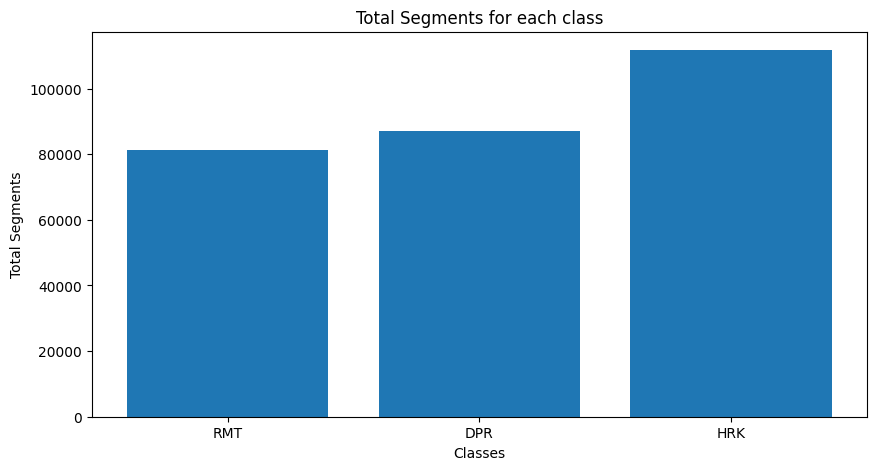

In [342]:
plot_segments(y, label_mapping_3_classes)

In [343]:
def calculate_f_ratios(mfcc_data, labels):
    f_ratios = []
    n_mfcc = mfcc_data.shape[2]  # 16 MFCCs

    for i in range(n_mfcc):
        class_data = [mfcc_data[labels == label, 0, i] for label in np.unique(labels)]

        f_val, p_val = f_oneway(*class_data)
        f_ratios.append(f_val)

    return f_ratios

In [344]:
def get_top_3_coefficients(f_ratios):
    return np.argsort(f_ratios)[-3:]

In [345]:
def plot_3d_interactive(mfcc_data, labels, top_3_indices, label_mapping):
    x = mfcc_data[:, 0, top_3_indices[0]]
    y = mfcc_data[:, 0, top_3_indices[1]]
    z = mfcc_data[:, 0, top_3_indices[2]]

    # Dynamically map the labels
    labels = [label_mapping[label] for label in labels]

    df = pd.DataFrame({
        f'MFCC {top_3_indices[0] + 1}': x,
        f'MFCC {top_3_indices[1] + 1}': y,
        f'MFCC {top_3_indices[2] + 1}': z,
        'Class': labels
    })

    fig = px.scatter_3d(df,
                        x=f'MFCC {top_3_indices[0] + 1}',
                        y=f'MFCC {top_3_indices[1] + 1}',
                        z=f'MFCC {top_3_indices[2] + 1}',
                        color='Class',
                        title='3D Scatter Plot of Top 3 MFCC')

    fig.write_html("top3-MFCC_plot.html")
    print("DONE")

In [346]:
f_ratios = calculate_f_ratios(X, y)
print(f_ratios)

[54904.73198346636, 11756.871948508462, 7863.470150725888, 869.6420805479195, 9140.39762626174, 1007.2956314869289, 875.9438231125686, 1237.811867434259, 1530.485425986881, 6488.3043904434035, 2206.3830776516565, 3924.1865391127317, 1903.373728335019, 7291.956313187427, 2193.989975227039, 1126.4846697038313]


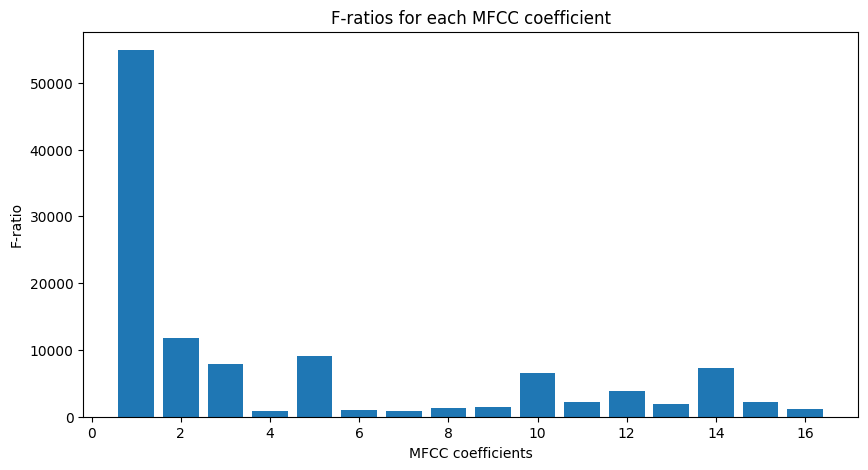

In [347]:
# draw the F-ratios
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(1, 17), f_ratios)
plt.xlabel("MFCC coefficients")
plt.ylabel("F-ratio")
plt.title("F-ratios for each MFCC coefficient")
plt.show()

In [348]:
# rank the F-ratios
sorted_indices = np.argsort(f_ratios)[::-1]
print(sorted_indices)

[ 0  1  4  2 13  9 11 10 14 12  8  7 15  5  6  3]


In [349]:
def get_first_n_samples_per_class(X, y, n_samples):
    unique_classes = np.unique(y)
    selected_indices = []

    for cls in unique_classes:
        # Indices des échantillons de la classe actuelle
        cls_indices = np.where(y == cls)[0]
        # Sélectionner les premiers 'n_samples' indices, si disponibles
        if len(cls_indices) >= n_samples:
            selected_indices.extend(cls_indices[:n_samples])
        else:
            selected_indices.extend(cls_indices)

    # Créer des sous-ensembles des données en utilisant les indices sélectionnés
    X_selected = X[selected_indices]
    y_selected = y[selected_indices]

    # Affichage pour vérifier les counts
    values, counts = np.unique(y_selected, return_counts=True)
    print(f"Selected counts per class: {dict(zip(values, counts))}")

    return X_selected, y_selected

# Exemple d'utilisation
top_3_indices = get_top_3_coefficients(f_ratios)

# Supposons que X et y sont vos données et labels
X_selected, y_selected = get_first_n_samples_per_class(X, y, 1000)

# Tracer le graphique avec les échantillons sélectionnés
plot_3d_interactive(X_selected, y_selected, top_3_indices, label_mapping_3_classes)

Selected counts per class: {0: 1000, 1: 1000, 2: 1000}
DONE
